In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

31.244678850543167 9.415394568615397
11.9792296535865 -155.00096402910532
31.363809737491692 -77.62245868680795
-42.940088414340366 -54.80845150926224
-21.29747074309897 -100.04839288099377
59.250770010718696 163.3779901058225
75.96188267515211 -46.24607948271941
68.57085585310571 102.27720365981389
59.033509081396915 -110.77648536513654
-88.90815945090225 -125.42368676032717
-35.923810455052035 112.68903951678698
78.24513573736812 166.46739813857647
15.72474144520777 173.9126705032822
-20.31310164394958 140.55859467723695
-5.872022000363714 -178.99621338468603
-20.762436245086093 -48.36065906070229
-55.68321204378661 -23.37831198871646
-61.75206941167252 167.92692756417614
23.459997536297152 140.33251690963635
44.079046934822884 79.97783553055905
35.48302796374786 3.225438187148683
24.309455194540604 -157.7602035245099
-16.02719701602743 -14.988868944188994
33.594703330833255 -82.2344909539662
-64.30106499284423 136.23715712795195
43.55248200226072 -58.517997767511034
-88.951641613842

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nalut
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | ossora
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | grand centre
City not found. Skipping...
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | mount isa
Processing Record 15 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 16 of Set 1 | viradouro
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | shingu
Processing Record 20 of Set 1 | zharkent
Processing Record 21 of Set 1 | birin
Processing Record 22 of Set 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nalut,30.3333,10.8500,88.48,19,47,16.40,LY,2022-07-29 23:09:36
1,Hilo,19.7297,-155.0900,87.28,78,100,0.00,US,2022-07-29 23:07:38
2,Georgetown,5.4112,100.3354,81.90,87,40,13.80,MY,2022-07-29 23:08:44
3,Mar Del Plata,-38.0023,-57.5575,51.87,74,0,5.01,AR,2022-07-29 23:09:37
4,Puerto Ayora,-0.7393,-90.3518,70.56,93,78,8.01,EC,2022-07-29 23:09:37


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nalut,LY,2022-07-29 23:09:36,30.3333,10.8500,88.48,19,47,16.40
1,Hilo,US,2022-07-29 23:07:38,19.7297,-155.0900,87.28,78,100,0.00
2,Georgetown,MY,2022-07-29 23:08:44,5.4112,100.3354,81.90,87,40,13.80
3,Mar Del Plata,AR,2022-07-29 23:09:37,-38.0023,-57.5575,51.87,74,0,5.01
4,Puerto Ayora,EC,2022-07-29 23:09:37,-0.7393,-90.3518,70.56,93,78,8.01


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

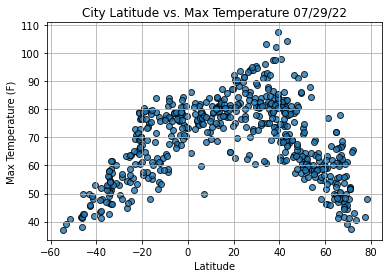

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

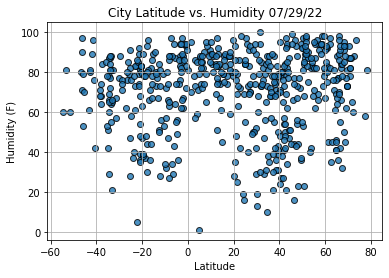

In [13]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

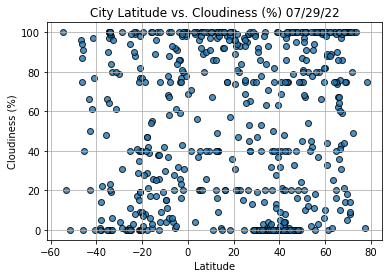

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

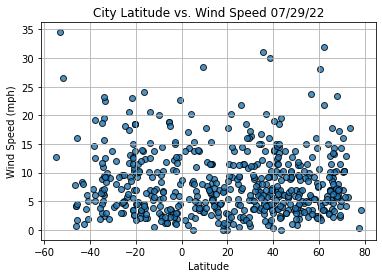

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()   

In [17]:
city_data_df.head(20)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nalut,LY,2022-07-29 23:09:36,30.3333,10.8500,88.48,19,47,16.40
1,Hilo,US,2022-07-29 23:07:38,19.7297,-155.0900,87.28,78,100,0.00
2,Georgetown,MY,2022-07-29 23:08:44,5.4112,100.3354,81.90,87,40,13.80
3,Mar Del Plata,AR,2022-07-29 23:09:37,-38.0023,-57.5575,51.87,74,0,5.01
4,Puerto Ayora,EC,2022-07-29 23:09:37,-0.7393,-90.3518,70.56,93,78,8.01
5,Ossora,RU,2022-07-29 23:09:38,59.2353,163.0719,54.97,73,100,14.32
6,Ilulissat,GL,2022-07-29 23:09:38,69.2167,-51.1000,50.02,62,75,2.30
7,Khatanga,RU,2022-07-29 23:09:38,71.9667,102.5000,65.52,60,49,12.95
8,Punta Arenas,CL,2022-07-29 23:09:39,-53.1500,-70.9167,39.31,81,20,34.52
9,Busselton,AU,2022-07-29 23:09:39,-33.6500,115.3333,51.40,64,98,22.46


In [18]:
index13 = city_data_df.loc[13]
index13

City                    Viradouro
Country                        BR
Date          2022-07-29 23:09:41
Lat                      -20.8731
Lng                      -48.2969
Max Temp                    76.42
Humidity                       36
Cloudiness                     77
Wind Speed                   6.91
Name: 13, dtype: object

In [19]:
city_data_df['Lat'] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
551     True
552    False
553     True
554    False
555     True
Name: Lat, Length: 556, dtype: bool

In [20]:
city_data_df.loc[(city_data_df['Lat'] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nalut,LY,2022-07-29 23:09:36,30.3333,10.8500,88.48,19,47,16.40
1,Hilo,US,2022-07-29 23:07:38,19.7297,-155.0900,87.28,78,100,0.00
2,Georgetown,MY,2022-07-29 23:08:44,5.4112,100.3354,81.90,87,40,13.80
5,Ossora,RU,2022-07-29 23:09:38,59.2353,163.0719,54.97,73,100,14.32
6,Ilulissat,GL,2022-07-29 23:09:38,69.2167,-51.1000,50.02,62,75,2.30
...,...,...,...,...,...,...,...,...,...
549,Saint-Georges,GD,2022-07-29 23:21:04,12.0564,-61.7485,80.28,83,20,9.22
550,Valday,RU,2022-07-29 23:24:02,57.9747,33.2525,48.24,94,66,5.46
551,Nipawin,CA,2022-07-29 23:24:02,53.3668,-104.0009,87.84,40,40,10.36
553,Foix,FR,2022-07-29 23:24:03,42.8333,1.5833,61.99,92,93,2.01


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

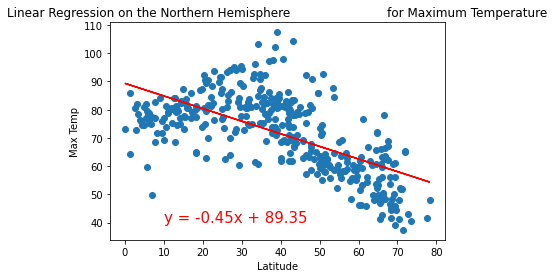

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

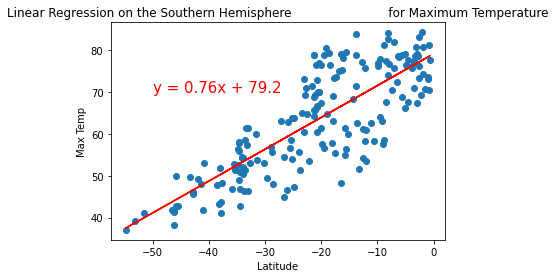

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,70))

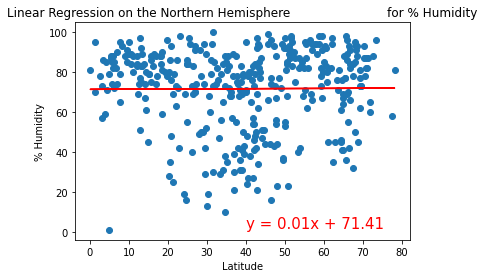

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,2))

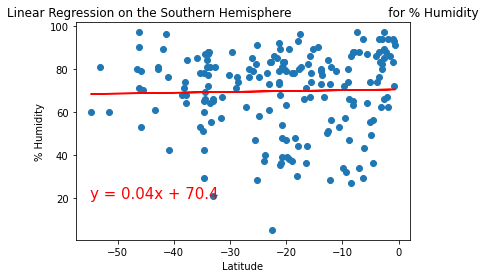

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,20))

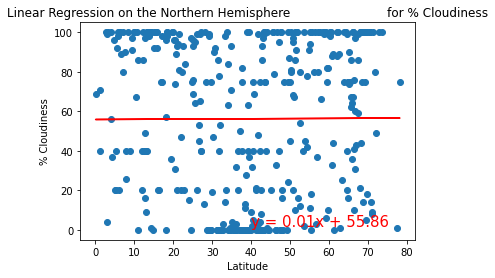

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,2))

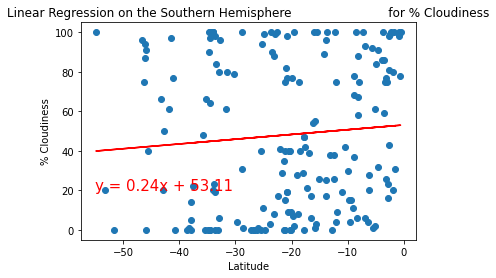

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,20))

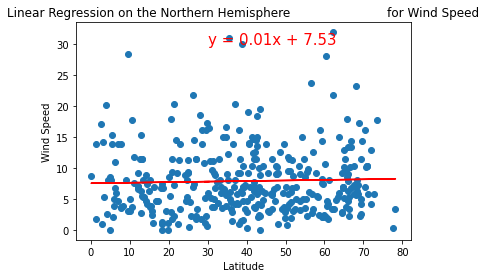

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30,30))

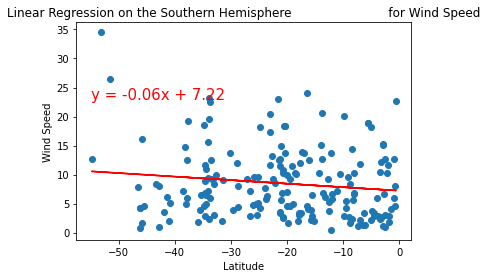

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,23))